# Implementing PCA on Satallite Images

## Import Section

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import math
from PIL import Image as im
from statistics import variance

## Loading Images and Creating Arrays

In [30]:
img1 = im.open('satallite images/band1.jpg')
img1.load()
img1_arr = np.asarray(img1, dtype='int32').T
img2 = im.open('satallite images/band2.jpg')
img2.load()
img2_arr = np.asarray(img2, dtype='int32').T
img3 = im.open('satallite images/band3.jpg')
img3.load()
img3_arr = np.asarray(img3, dtype='int32').T
img4 = im.open('satallite images/band4.jpg')
img4.load()
img4_arr = np.asarray(img4, dtype='int32').T


## Generating Pixel Values

In [31]:
pixVal1 = []
pixVal2 = []
pixVal3 = []
pixVal4 = []

for i in range(512):
    for j in range(512):
        pixVal1.append(img1_arr[i][j])

for i in range(512):
    for j in range(512):
        pixVal2.append(img2_arr[i][j])

for i in range(512):
    for j in range(512):
        pixVal3.append(img3_arr[i][j])

for i in range(512):
    for j in range(512):
        pixVal4.append(img4_arr[i][j])

#print(np.array(pixVal1).shape)

## Appending all the lists to a single list

In [32]:
cImage = []
cImage.append([pixVal1,pixVal2,pixVal3,pixVal4])
((np.array(cImage)).shape)
cImageMod = cImage[0]
(np.array(cImageMod).shape)
np.array(cImageMod).shape
#(cImageMod)

(4, 262144)

## Creating Covariance Matrix

In [33]:
#cov_mat = np.array(np.dot(cImageMod, np.transpose(cImageMod)))
cov_mat = np.array(np.cov(cImageMod))
print(cov_mat)

[[ 7.39056118  6.37133815  8.85835449  2.05945495]
 [ 6.37133815  6.60222402  8.85052835  3.57685562]
 [ 8.85835449  8.85052835 15.75011491  3.96733057]
 [ 2.05945495  3.57685562  3.96733057 37.80738645]]


## Calculating Eigen Values and Eigen Vectors

In [34]:
eVal, eVec = la.eig(cov_mat)
# print(eVal)
# print(eVec)
idx = eVal.argsort()[::-1]
eVal = eVal[idx]
#eVec = eVec[:,idx]
print(eVal)
print(eVec)

[40.24007103 24.74509738  2.03876264  0.52635551]
[[ 0.17494902 -0.45452022 -0.57973314  0.65323326]
 [ 0.20630134 -0.41536811  0.80494128  0.37010624]
 [ 0.28671959 -0.68303992 -0.12223959 -0.6605345 ]
 [ 0.91903453  0.3928577  -0.03219491 -0.00135768]]


## Transposing Eigen Vectors

In [35]:
eVec = np.transpose(eVec)
print(eVec)


[[ 0.17494902  0.20630134  0.28671959  0.91903453]
 [-0.45452022 -0.41536811 -0.68303992  0.3928577 ]
 [-0.57973314  0.80494128 -0.12223959 -0.03219491]
 [ 0.65323326  0.37010624 -0.6605345  -0.00135768]]


## Calculating Principal Component for 4 Images of Different Bands

In [36]:
image1 = []
image2 = []
image3 = []
image4 = []

image1 = np.dot(np.transpose(eVec[0]), cImageMod)
image2 = np.dot(np.transpose(eVec[1]), cImageMod)
image3 = np.dot(np.transpose(eVec[2]), cImageMod)
image4 = np.dot(np.transpose(eVec[3]), cImageMod)


In [37]:
image1

array([33.01745796, 33.73019115, 33.73019115, ..., 13.51623696,
       11.47186655, 11.18514697])

## Creating Image arrays for actual modification

In [38]:
first_band = [[0 for i in range(512)] for j in range(512)]
sec_band = [[0 for i in range(512)] for j in range(512)]
third_band = [[0 for i in range(512)] for j in range(512)]
four_band = [[0 for i in range(512)] for j in range(512)]

## Modifying Image arrays

In [39]:
k = 0
for i in range(512):
    for j in range(512):
        first_band[i][j] = image1[j + k]
    k = k + 512
k = 0
for i in range(512):
    for j in range(512):
        sec_band[i][j] = image2[j + k]
    k = k + 512
k = 0
for i in range(512):
    for j in range(512):
        third_band[i][j] = image3[j + k]
    k = k + 512
k = 0
for i in range(512):
    for j in range(512):
        four_band[i][j] = image4[j + k]
    k = k + 512
#first_band

## Generating Output Arrays

In [40]:
output1 = np.array(np.transpose(first_band))
output2 = np.array(np.transpose(sec_band))
output3 = np.array(np.transpose(third_band))
output4 = np.array(np.transpose(four_band))

#output1

## Displaying Images for Different Bands

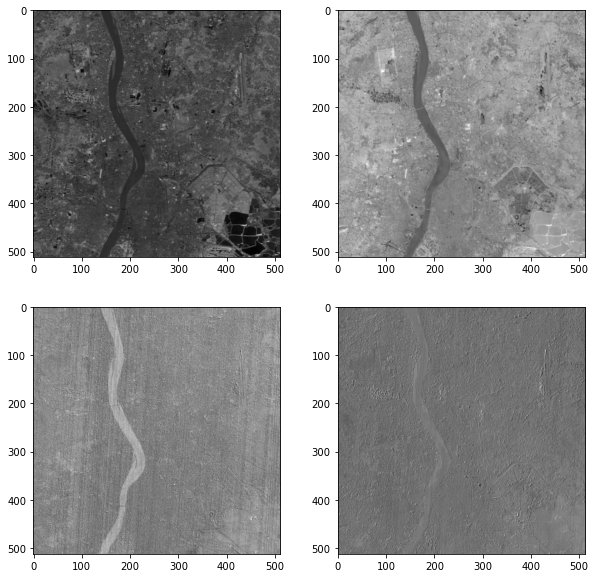

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output1,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(output2,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(output3,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(output4,cmap='gray')
plt.show()

## Eigen Value Mapping

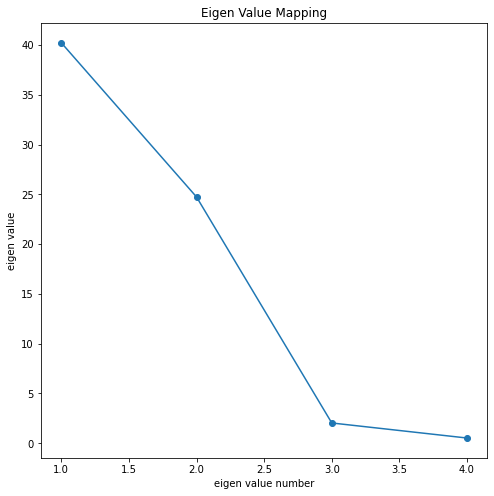

In [42]:
eValNum = [1,2,3,4]
plt.figure(figsize=(8,8))
plt.plot(eValNum, eVal,'-o')
plt.xlabel('eigen value number')
plt.ylabel('eigen value')
plt.title('Eigen Value Mapping')
plt.show()